# ANALYSIS OF DELAYS IN US AIRPORT FROM 2016-2016

The *INSERT DEPARTMENT* released the statistics of the delays at each airports in the United States from 2006-2016. The data is useful to study the delay at the airport as well as of those related by the airline carriers. There are many ways one can study, extract, and analyze this dataset. Depending on research interest, one can study the different causes of delays at each airport. One can also study each airline's performance. The possibilities are infinite. In this study, I am interested in statistical exploratory and inferential on these topics:

1. The statistics of delays at specific airport
2. The correlation of delays in between major airport
3. Performance comparison in between airline carriers.
4. *keep adding

The data is available at *insert link*

1. Statistics of delays at specific airport.

This is a big (considerably) dataset. Let us work in smaller scale by focusing on specific airport. First, we will take a look at three busy airports, JFK (New York), ORD (Chicago), IAH (Houston), and two less-busy airports, SEA (Seattle-Tacoma) and BOS (Boston).

Let us load the data

In [1]:
#some import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('selected_columns_2006_2016.csv')
df.head()

,year,month,carrier,airport,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2006,8,AA,ABQ,310.0,73.0,5.0,1.0,3742.0,838.0,585.0,729.0,21.0,1569.0
1,2006,8,AA,ANC,62.0,38.0,0.0,0.0,2605.0,879.0,100.0,870.0,0.0,756.0
2,2006,8,AA,ATL,731.0,188.0,15.0,7.0,9808.0,1584.0,847.0,4329.0,62.0,2986.0
3,2006,8,AA,AUS,802.0,171.0,9.0,0.0,9413.0,2048.0,775.0,1792.0,68.0,4730.0
4,2006,8,AA,BDL,279.0,80.0,3.0,0.0,4855.0,889.0,231.0,1238.0,7.0,2490.0


Column description:

arr_flights shows the number of arrival flight by the specific carrier on that airport at that particular year and month

arr_del15 shows the number of arrivals that are delayed. FAA defines a delay as any aircraft that departs or arrives late by 15 mins.

arr_cancelled shows the number of flights that are cancelled

arr_diverted shows the number of flights that are diverted.

arr_delay shows the total minutes of the delay. They are then break down into five categories of delay, shown in carrier_delay, weather_delay, nas_delay, security_delay, and late_aircraft_delay.

In [3]:
#JFK

df_jfk = df[df['airport'] =='JFK']
df_jfk.head()
df_jfk.tail()

,year,month,carrier,airport,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
162047,2016,8,AS,JFK,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162114,2016,8,B6,JFK,3732.0,1033.0,68.0,3.0,81120.0,12609.0,2503.0,32638.0,440.0,32930.0
162177,2016,8,DL,JFK,2808.0,770.0,35.0,14.0,76308.0,28348.0,803.0,26479.0,0.0,20678.0
162562,2016,8,HA,JFK,31.0,6.0,0.0,0.0,129.0,129.0,0.0,0.0,0.0,0.0
162893,2016,8,VX,JFK,364.0,106.0,0.0,0.0,6262.0,1792.0,290.0,3602.0,32.0,546.0


In [4]:
df_jfk = df_jfk.dropna()
df_jfk.describe()

,year,month,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,2010.785515,6.575673,1021.092851,247.600743,24.581244,3.639740,16058.454039,3636.957289,634.543175,7040.772516,20.947075,4725.233983
std,2.948040,3.445147,1195.604013,316.683620,47.866665,6.216675,22717.543561,4461.684143,1426.268552,10424.727043,63.300707,8724.088614
min,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,4.000000,178.000000,41.000000,1.000000,0.000000,2535.000000,573.000000,12.000000,1042.000000,0.000000,425.000000
50%,2011.000000,7.000000,464.000000,113.000000,6.000000,1.000000,6895.000000,1475.000000,193.000000,3076.000000,0.000000,1520.000000
75%,2013.000000,10.000000,1403.000000,327.000000,25.000000,4.000000,19801.000000,5405.000000,597.000000,8296.000000,15.000000,4638.000000
max,2016.000000,12.000000,5233.000000,1970.000000,473.000000,62.000000,151145.000000,28348.000000,12193.000000,90406.000000,833.000000,61563.000000


In [5]:
#I am interested with total the number of delay on each month, with all the airlines combined
#therefore we will do some data aggregation

df_jfk_pivot = df_jfk.pivot_table('arr_del15', ['year'], ['month'], aggfunc='sum')# fill_value=0)
df_jfk_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2862.0,2767.0,2863.0,3430.0,3831.0
2007,3223.0,3206.0,4263.0,4022.0,3509.0,4386.0,4162.0,4138.0,2392.0,2816.0,2642.0,3538.0
2008,2356.0,2755.0,2853.0,2550.0,2097.0,3382.0,4289.0,4121.0,2310.0,1550.0,2048.0,3238.0
2009,2309.0,1663.0,1929.0,2761.0,3326.0,3562.0,3184.0,3104.0,1673.0,1633.0,1109.0,2338.0
2010,2007.0,1914.0,2779.0,1419.0,2182.0,2085.0,2476.0,1945.0,1707.0,1871.0,1282.0,2401.0
2011,1683.0,1493.0,1606.0,2145.0,2037.0,2034.0,1950.0,2280.0,1725.0,1273.0,971.0,1088.0
2012,1099.0,771.0,1527.0,799.0,1188.0,1644.0,2089.0,1961.0,1556.0,1190.0,1197.0,1996.0
2013,1519.0,1820.0,2038.0,2142.0,2660.0,2918.0,3458.0,2411.0,1496.0,1327.0,1265.0,2481.0
2014,2065.0,1664.0,1466.0,1670.0,2029.0,2135.0,2540.0,1990.0,1534.0,1789.0,1354.0,2018.0


In [6]:
df_jfk_pivot_mean = df_jfk_pivot.mean()
df_jfk_pivot_mean

month
1     1988.000000
2     1930.900000
3     2249.500000
4     2101.900000
5     2197.700000
6     2629.100000
7     2879.300000
8     2633.090909
9     1866.500000
10    1781.000000
11    1644.200000
12    2502.100000
dtype: float64

In [7]:
df_jfk_pivot_var = df_jfk_pivot.var()
df_jfk_pivot_var

month
1     335179.111111
2     448809.877778
3     751820.944444
4     778371.655556
5     594244.011111
6     793688.322222
7     757059.344444
8     715413.090909
9     204618.500000
10    357658.666667
11    655195.955556
12    675173.211111
dtype: float64

In [8]:
df_jfk_pivot.fillna(df_jfk_pivot.mean(), inplace=True)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2006,1988.0,1930.9,2249.5,2101.9,2197.7,2629.1,2879.3,2862.0,2767.0,2863.0,3430.0,3831.0
2007,3223.0,3206.0,4263.0,4022.0,3509.0,4386.0,4162.0,4138.0,2392.0,2816.0,2642.0,3538.0
2008,2356.0,2755.0,2853.0,2550.0,2097.0,3382.0,4289.0,4121.0,2310.0,1550.0,2048.0,3238.0
2009,2309.0,1663.0,1929.0,2761.0,3326.0,3562.0,3184.0,3104.0,1673.0,1633.0,1109.0,2338.0
2010,2007.0,1914.0,2779.0,1419.0,2182.0,2085.0,2476.0,1945.0,1707.0,1871.0,1282.0,2401.0
2011,1683.0,1493.0,1606.0,2145.0,2037.0,2034.0,1950.0,2280.0,1725.0,1273.0,971.0,1088.0
2012,1099.0,771.0,1527.0,799.0,1188.0,1644.0,2089.0,1961.0,1556.0,1190.0,1197.0,1996.0
2013,1519.0,1820.0,2038.0,2142.0,2660.0,2918.0,3458.0,2411.0,1496.0,1327.0,1265.0,2481.0
2014,2065.0,1664.0,1466.0,1670.0,2029.0,2135.0,2540.0,1990.0,1534.0,1789.0,1354.0,2018.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E1A104588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000012E1A708080>]], dtype=object)

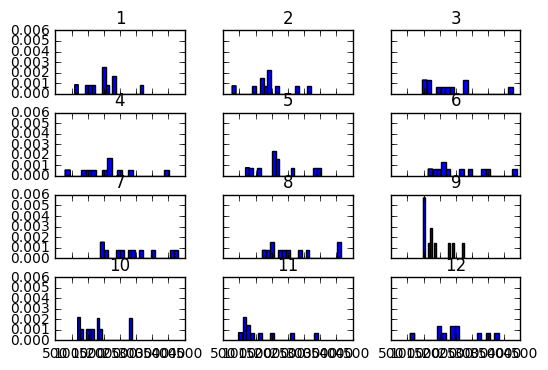

In [9]:
#below is the histogram of delay at each month.
#the distribution is not distributed evenly

df_jfk_pivot.hist(bins=20, normed=True, sharex=True, sharey=True, grid=False)

In [10]:
#perhaps we should do histogram with all the month combined 
#after all, the data are presented on a monthly basis, not daily basis
#we just have to manipulate the pivot table first

df_jfk_pivot_everything = df_jfk.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')# fill_value=0)
df_jfk_pivot_everything.head()


year  month
2006  8        2862.0
      9        2767.0
      10       2863.0
      11       3430.0
      12       3831.0
Name: arr_del15, dtype: float64

In [147]:
df_jfk_mean = df_jfk_pivot_everything.mean()
df_jfk_var = df_jfk_pivot_everything.var()
df_jfk_mean, df_jfk_var

(2203.8512396694214, 675014.194352617)

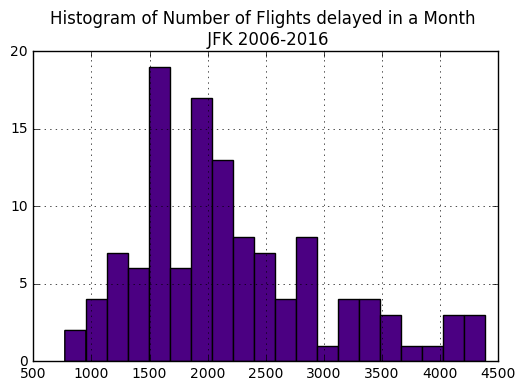

In [11]:
plt.subplot()
df_jfk_pivot_everything.hist(bins=20, color = 'indigo')
plt.title("Histogram of Number of Flights delayed in a Month \n JFK 2006-2016")

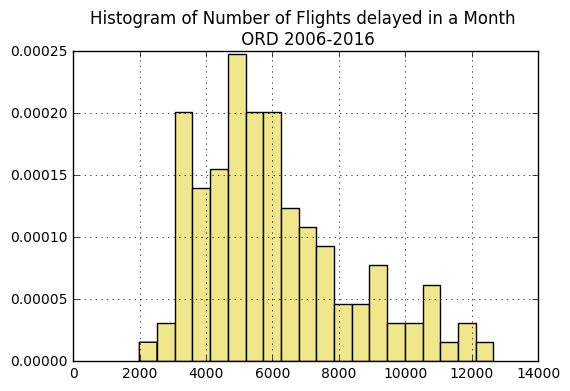

In [173]:
# We can do the same for ORD, IAH, SEA, and BOS

#airport = ['ORD','IAH','SEA','BOS']
#for k in airport:

airport = 'ORD'
color = 'khaki'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.hist(bins=20, normed=True, color=color)
plt.title("Histogram of Number of Flights delayed in a Month \n %s 2006-2016" % airport)
    

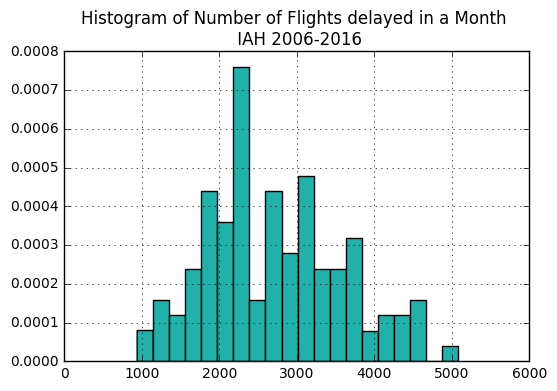

In [174]:
airport = 'IAH'
color = 'lightseagreen'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.hist(bins=20, normed=True, color=color)
plt.title("Histogram of Number of Flights delayed in a Month \n %s 2006-2016" % airport)

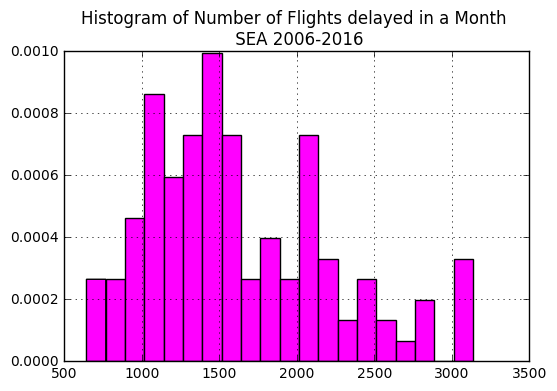

In [175]:
airport = 'SEA'
color = 'magenta'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.hist(bins=20, normed=True, color=color)
plt.title("Histogram of Number of Flights delayed in a Month \n %s 2006-2016" % airport)

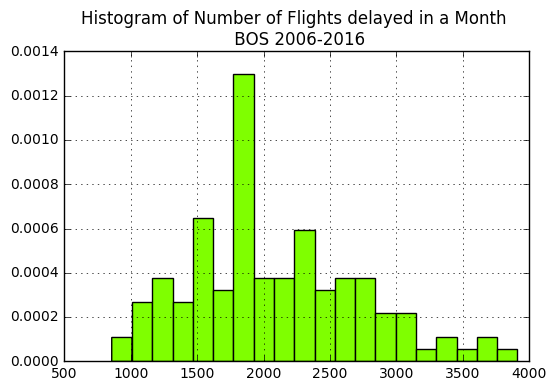

In [176]:
airport = 'BOS'
color = 'chartreuse'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.hist(bins=20, normed=True, color=color)
plt.title("Histogram of Number of Flights delayed in a Month \n %s 2006-2016" % airport)

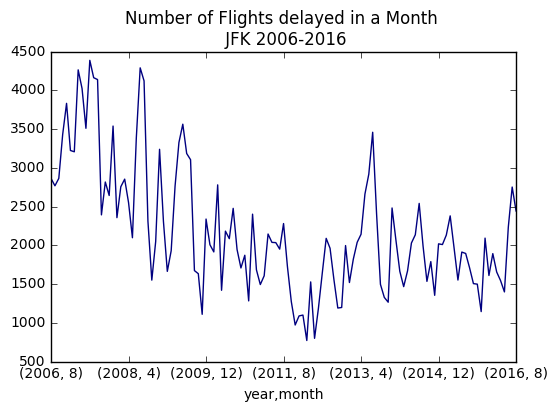

In [181]:
#We can also do some time series plot

airport = 'JFK'
color = 'navy'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.plot(color=color)
plt.title("Number of Flights delayed in a Month \n %s 2006-2016" % airport)


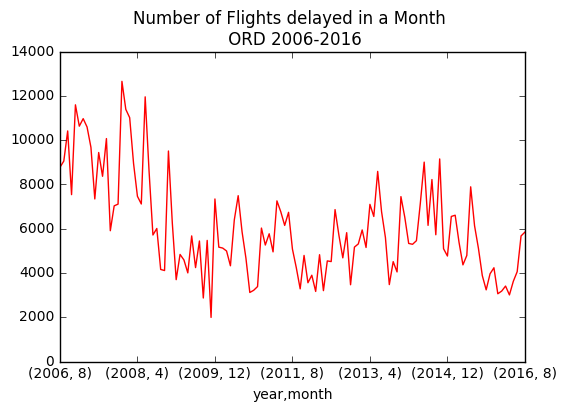

In [185]:
airport = 'ORD'
color = 'red'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.plot(color=color)
plt.title("Number of Flights delayed in a Month \n %s 2006-2016" % airport)

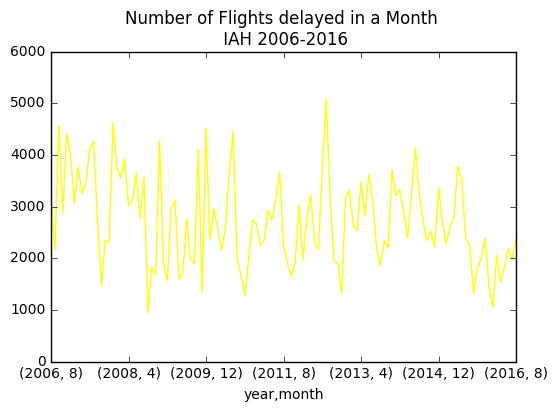

In [186]:
airport = 'IAH'
color = 'yellow'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.plot(color=color)
plt.title("Number of Flights delayed in a Month \n %s 2006-2016" % airport)

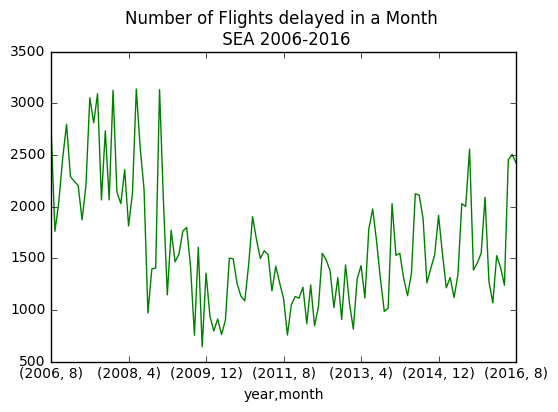

In [187]:
airport = 'SEA'
color = 'green'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.plot(color=color)
plt.title("Number of Flights delayed in a Month \n %s 2006-2016" % airport)

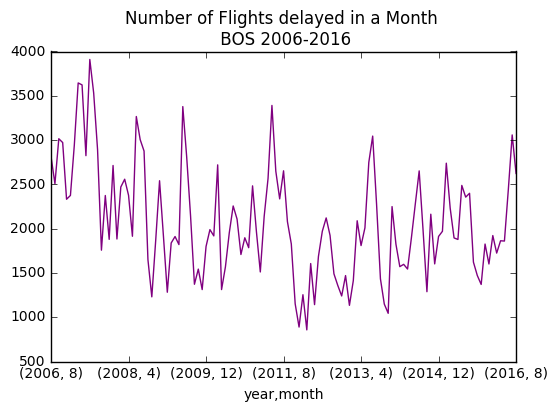

In [188]:
airport = 'BOS'
color = 'purple'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')

plt.subplot()
df_delay_pivot.plot(color=color)
plt.title("Number of Flights delayed in a Month \n %s 2006-2016" % airport)

In [ ]:
#INSERT COMMENTS

In [146]:
#The data seems skewed to the right. Perhaps gamma distrbution will best fit into this data
#we will use the calculated mean and variance from above as a sample mean and variance for each month


# estimate moments of alpha and beta from the sample moments
alpha_mom = df_jfk_mean ** 2 / df_jfk_var
beta_mom = df_jfk_var / df_jfk_mean

print(alpha_mom)
print(beta_mom)

7.195345412329573
306.288456408641


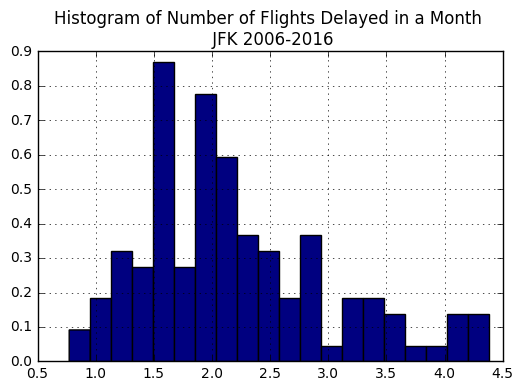

In [13]:
airport = 'JFK'
color = 'navy'

df_airport = df[df['airport'] == airport]
df_delay_pivot = df_airport.pivot_table('arr_del15', ['year', 'month'], aggfunc='sum')
df_jfk_delay = df_delay_pivot / 1000

plt.subplot()
df_jfk_delay.hist(bins=20, normed=True, color=color)
plt.title("Histogram of Number of Flights Delayed in a Month \n %s 2006-2016" % airport)

In [14]:
print(df_jfk_delay.mean())
print(df_jfk_delay.var())

2.2038512396694205
0.675014194352617


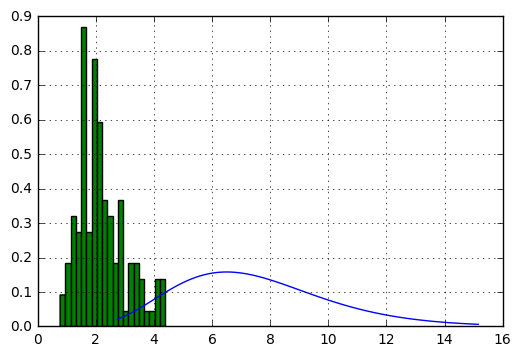

In [21]:
#we can estimate the probability distribution using a continuous distribution
#let us use gamma distribution
# ref for continuous dist: scypy-ref-0.18.1 p. 1432
#for reference on discrete distributions, refer to p. 1643 

from scipy.stats import gamma

fig, ax = plt.subplots(1,1)
# or just fig.subplots()

#getting alpha and beta from the sampled mean and variance

alpha_mom = df_jfk_delay.mean() ** 2 / df_jfk_delay.var()
beta_mom = df_jfk_delay.var() / df_jfk_delay.mean()

mean, var, skew, kurt = gamma.stats(alpha_mom, beta_mom, moments='mvsk')

x = np.linspace(gamma.ppf(0.01, alpha_mom, beta_mom), gamma.ppf(0.99, alpha_mom, beta_mom), 100)
ax.plot(x, gamma.pdf(x, alpha_mom, beta_mom))

df_jfk_delay.hist(bins=20, normed=True)
#plt.plot(np.linspace(0, 5), poisson.pmf(np.linspace(0,5), mu))


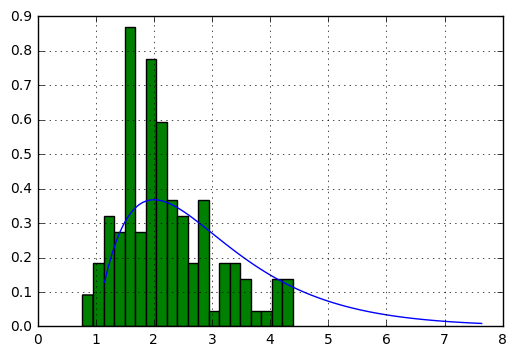

In [54]:
#our estimates are definitely off from the distribution.
# we need to "tweak" the parameter

alpha_mom = 2
beta_mom = 1

fig, ax = plt.subplots(1,1)

x = np.linspace(gamma.ppf(0.01, alpha_mom, beta_mom), gamma.ppf(0.99, alpha_mom, beta_mom), 100)
ax.plot(x, gamma.pdf(x, alpha_mom, beta_mom))

df_jfk_delay.hist(bins=20, normed=True)

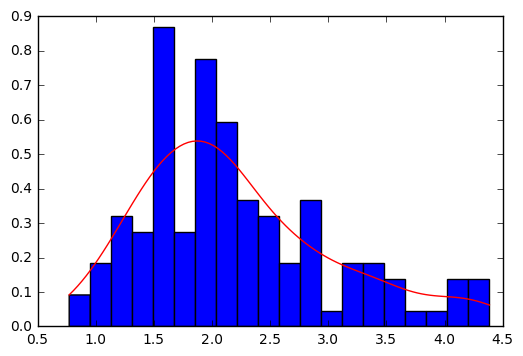

In [79]:
#WE can also use kernel density estimates (kde)

from scipy.stats import kde

density = kde.gaussian_kde(df_jfk_delay.ravel())
xgrid = np.linspace(df_jfk_delay.ravel().min(), df_jfk_delay.ravel().max(), 100)
plt.hist(df_jfk_delay, bins=20, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

In [ ]:
#our exhaustive trial-and-error still cannot perfectly describe the probability distribution of the delay
#perhaps we should use other types of continuous distribution
#OR
#We can estimate the true unknown parameter using MLE (Maximum Likelihood Parameter)

In [63]:
#we need to find the maximum of gamma function, which we can differentiate and solve for the parameter
#however, we cannot find such parameter unless we perform a numerical approximation

#we will use newton-raphson algorithm to perform the approximation
from scipy.optimize import newton

# we need a function that will return the first and second derivative of the gamma function
#we will import psi and polygamma, where psi and polygamma are the complex function of the gamma function
from scipy.special import psi, polygamma

#this is first order differentiation
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log

#this is second order differentiation
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

#we need to find out the log_mean and mean_log
log_mean = np.log(df_jfk_delay.mean())
mean_log = (np.log(df_jfk_delay)).mean()

In [64]:
#optimize using newton

alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean, mean_log))
alpha_mle

7.6672560926816624

In [65]:
beta_mle = alpha_mle/df_jfk_delay.mean()
beta_mle

3.4790261496196799

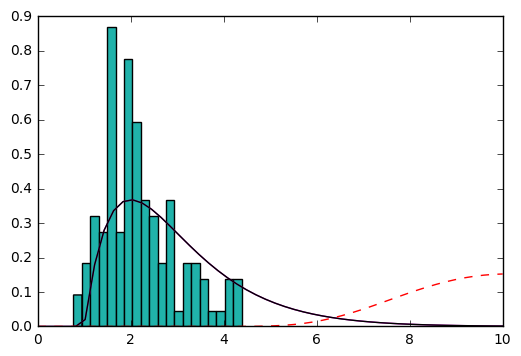

In [67]:
df_jfk_delay.hist(normed=True, bins=20, grid=False, color='lightseagreen')

x = np.linspace(0, 10)
plt.plot(x, gamma.pdf(x, alpha_mom, beta_mom), 'm-')
plt.plot(x, gamma.pdf(x, 2, 1), 'k-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

In [ ]:
# to be continued using pymc3